In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Loading training and testing data


In [2]:
titanic_train_file_path = "/kaggle/input/titanic/train.csv"
titanic_data = pd.read_csv(titanic_train_file_path)
titanic_test_file_path = "/kaggle/input/titanic/test.csv"
test_data = pd.read_csv(titanic_test_file_path)

In [3]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Preproccessing 


## Filing missing age values with age mean (better here than median)

In [8]:
titanic_data["Age"].fillna(titanic_data['Age'].mean(), inplace = True)
test_data["Age"].fillna(test_data['Age'].mean(), inplace = True)

In [9]:
#titanic_data["Cabin"].fillna( method ='pad', inplace = True)
#titanic_data["Cabin"].fillna( method ='bfill', inplace = True)
#test_data["Cabin"].fillna( method ='pad', inplace = True)
#test_data["Cabin"].fillna( method ='bfill', inplace = True)
#test_data.isnull().sum()

## Filling missing fare value in the test data using pad method

In [10]:
#titanic_data["Embarked"].fillna( method ='pad', inplace = True)
test_data["Fare"].fillna( method ='pad', inplace = True)
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## Transorming male to 1 and female to 0

In [11]:
titanic_data['Sex'].replace('female', 0,inplace=True)
titanic_data['Sex'].replace('male', 1,inplace=True)

test_data['Sex'].replace('female', 0,inplace=True)
test_data['Sex'].replace('male', 1,inplace=True)

## Choosing Pclass, Sex, Age,SibSp, Parch, and Fare as Features

In [12]:
y = titanic_data.Survived
features = ['Pclass', 'Sex', 'Age','SibSp', 'Parch', 'Fare']
X = titanic_data[features]

## Spliting the training data 0.15/0.85

In [13]:
from sklearn.model_selection import  train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size=0.15, train_size=0.85, random_state = 1)

# Training, validating, and comparing the accuray score of different classifers

## Decision tree with variable max_leaf_nodes

In [14]:
from sklearn.tree import DecisionTreeRegressor
def get_acc_score_dtree(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes ,random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    output = preds_val.round(0).astype(int)
    acc = accuracy_score(val_y, output)
    return(acc)

## KNN with variable n_neighbors

In [15]:
from sklearn.neighbors import KNeighborsClassifier
def get_acc_score_KNN(n_neighbors, train_X, val_X, train_y, val_y):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    output = preds_val.round(0).astype(int)
    acc = accuracy_score(val_y, output)
    return(acc)

## SVC with linear kernel

In [16]:
from sklearn.svm import SVC
def get_acc_score_SVC(train_X, val_X, train_y, val_y):
    model = SVC(kernel='linear')
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    output = preds_val.round(0).astype(int)
    acc = accuracy_score(val_y, output)
    return(acc)

## Naive bayes classifer

In [17]:
from sklearn.naive_bayes import MultinomialNB
def get_acc_score_naive(train_X, val_X, train_y, val_y):
    model = MultinomialNB()
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    output = preds_val.round(0).astype(int)
    acc = accuracy_score(val_y, output)
    return(acc)

## Random forest with variable max_depth

In [18]:
from sklearn.ensemble import RandomForestClassifier
def get_acc_score_rforest(max_depth, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_depth=max_depth ,random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    output = preds_val.round(0).astype(int)
    acc = accuracy_score(val_y, output)
    return(acc)

## Calling decision tree function with multiple candidate max leaf nodes and then choosing the best tree size

In [19]:
from sklearn.metrics import accuracy_score
acc_dict = {}
candidate_max_leaf_nodes = [ 2,3,4,5,6,7,8,9,10, 25, 45,50,65, 100 ,125,150,175,200, 250,300 ]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
best_tree_size = candidate_max_leaf_nodes[0]
last_acc = float('inf')
max_acc = float('inf')
for max_leaf_nodes in candidate_max_leaf_nodes:
    acc = get_acc_score_dtree(max_leaf_nodes, train_X, val_X, train_y, val_y)
    if(acc > last_acc):
        best_tree_size = max_leaf_nodes
        max_acc = acc
    last_acc = acc
acc_dict["Decision tree"] = max_acc
print("Accuracy:",max_acc)
print("Best tree size:",best_tree_size)

Accuracy: 0.8432835820895522
Best tree size: 45


## Calling SVC function and prinitng its accuracy score

In [20]:

max_acc = get_acc_score_SVC(train_X, val_X, train_y, val_y)
acc_dict["SVC"] = acc
print("Accuracy:",max_acc)
 

Accuracy: 0.7686567164179104


## Calling naive bayes function and prinitng its accuracy score

In [21]:
max_acc = get_acc_score_naive(train_X, val_X, train_y, val_y)
acc_dict["Naive bayes"] = acc
print("Accuracy:",max_acc)

Accuracy: 0.6268656716417911


## Calling KNN function with multiple candidate nearest neighbors and then choosing the best number of neighbors

In [22]:
neighbors_number = [ 2,3,4,5,6,7,8,9,10, 25, 45,50,65, 100 ,125,150,175,200, 250,300 ]
last_acc = float('inf')
max_acc = float('inf')
for neighbor in neighbors_number:
    acc = get_acc_score_KNN(neighbor, train_X, val_X, train_y, val_y)
    if(acc > last_acc):
        best_neighbor = neighbor
        max_acc = acc
    last_acc = acc
acc_dict["KNN"] = max_acc
print("Accuracy:",max_acc)
print("Best neighbors:",best_neighbor)

Accuracy: 0.6268656716417911
Best neighbors: 200


## Calling random forest function with multiple candidate max depths and then choosing the max depth

In [23]:
candidate_max_depths = [ 2,3,4,5,6,7,8,9,10, 25, 45,50,65, 100 ,125,150,175,200, 250,300 ]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
best_max_depth = candidate_max_depths[0]
last_acc = float('inf')
max_acc = float('inf')
for best_max_depth in candidate_max_depths:
    acc = get_acc_score_rforest(best_max_depth, train_X, val_X, train_y, val_y)
    if(acc > last_acc):
        best_max_depth = best_max_depth
        max_acc = acc
    last_acc = acc
acc_dict["Random forest"] = max_acc
print("Accuracy:",max_acc)
print("Best max depth:",best_max_depth)

Accuracy: 0.7985074626865671
Best max depth: 300


# Visualizing different classifiers' accuracies 

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

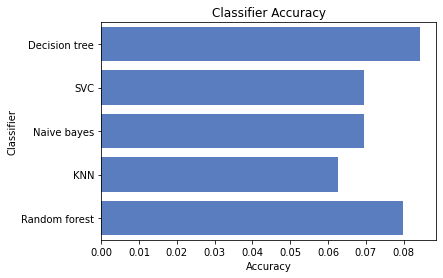

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)
for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

# Fitting the whole training data using the best classifer for this data (decision tree classifer)

In [25]:
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)
final_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=45, random_state=1)

# Prediting the surviving people in the test data using the decision tree model with max_leaf_nodes=best_tree_size for prediction

In [26]:
val_predictions = final_model.predict(test_data[features])
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': val_predictions.round(0)})
output = output.astype(int)
output.to_csv('my_submission5.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
